In [1]:
from vfield import render_flow_field
import torch
import matplotlib.pyplot as plt
from PIL import Image

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

vfield = torch.load('../data/vectorfield.pt')

grid = vfield['grid'].to(device)
displacement=vfield['displacement'].to(device)

Using device: cpu


100%|██████████| 1500/1500 [00:17<00:00, 84.44it/s] 


Converting to rgb image...
Resampling...


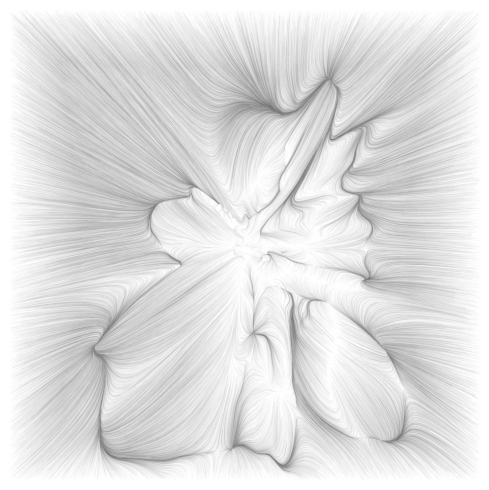

In [2]:
ff_img = render_flow_field(
    grid, displacement,
    W=5600, H=5600,
    particles=70_000,
    steps=1500,
    step_size=0.0001,
    bg_color=(255, 255, 255),
    trace_color=(0, 0, 0),
    random_colors=True,
    antialias=True,
    aa_factor=4
)

plt.figure(figsize=(15, 5))
plt.imshow(ff_img, origin='lower')
plt.axis('off')
plt.tight_layout()
plt.show()

ff_img = ff_img.transpose(Image.Transpose.FLIP_TOP_BOTTOM)
ff_img.save('../flow-field.png')
ff_img.show()